# Исследование продаж компьютерных игр интернет-магазина 

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


**Цель исследования -**

Изучить данные о продажах игр и выявить закономерности, определяющие их успешность, для определения потенциально популярного продукта.  

**Ход исследования**

1. Загрузка данных и обзор общей информации 
2. Предобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Общий вывод

**Описание данных**

   - Name — название игры
   - Platform — платформа
   - Year_of_Release — год выпуска
   - Genre — жанр игры
   - NA_sales — продажи в Северной Америке (миллионы проданных копий)
   - EU_sales — продажи в Европе (миллионы проданных копий)
   - JP_sales — продажи в Японии (миллионы проданных копий)
   - Other_sales — продажи в других странах (миллионы проданных копий)
   - Critic_Score — оценка критиков (максимум 100)
   - User_Score — оценка пользователей (максимум 10)
   - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    
 Данные за 2016 год могут быть неполными.

### Загрузка данных и обзор общей информации

#### Импорт библиотек и чтение данных из csv-файла

In [1]:
#импорт библиотеки pandas
import pandas as pd 
#импорт библиотеки numpy
import numpy as np
#импорт библиотеки seaborn
import seaborn as sns
#импорт библиотеки matplotlib
import matplotlib.pyplot as plt
#импорт библиотеки math
from math import factorial
from math import sqrt
#статистика
from scipy import stats as st
from scipy.stats import binom, norm
#импорт библиотеки missingno
import missingno as msno

#чтение файлов с данными и сохранение в переменной df
df = pd.read_csv ('/datasets/games.csv')
#отобразить все столбцы
pd.set_option('max_columns', None)

#### Вывод первых строк, изучение общей информации

In [2]:
#получение первых 5 строк
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# получение общей информации о данных 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


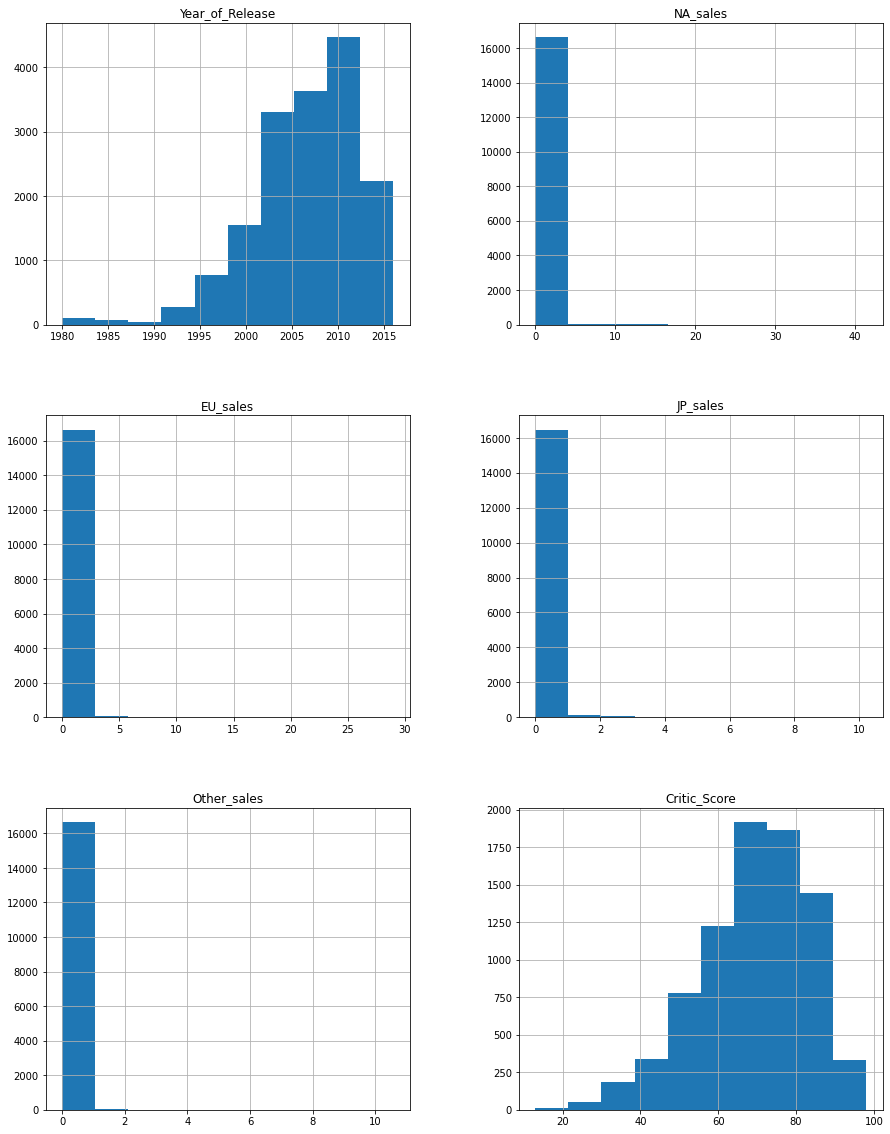

In [4]:
#построение гистрограммы для всех числовых столбцов
df.hist(figsize=(15,20))
plt.show()

#### Вывод

В представленном датафрейме 11 столбцов и 16715 записей с данными об играх. В нескольких столбцах обнаружены пропущенные значения, в столбцах 'Year_of_Release', 'Critic_Score', 'User_Score' некорректный тип данных, также наименования столбцов необходимо привести к нижнему регистру. Перейдем к обработке данных.

### Предобработка данных

#### Переименование столбцов

In [5]:
#перечень названий столбцов таблицы df
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
#приведение названия к нижнему регистру
df.columns = df.columns.str.lower()
#проверка
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Обработка пропущенных значений 

In [7]:
#подсчет пропусков
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

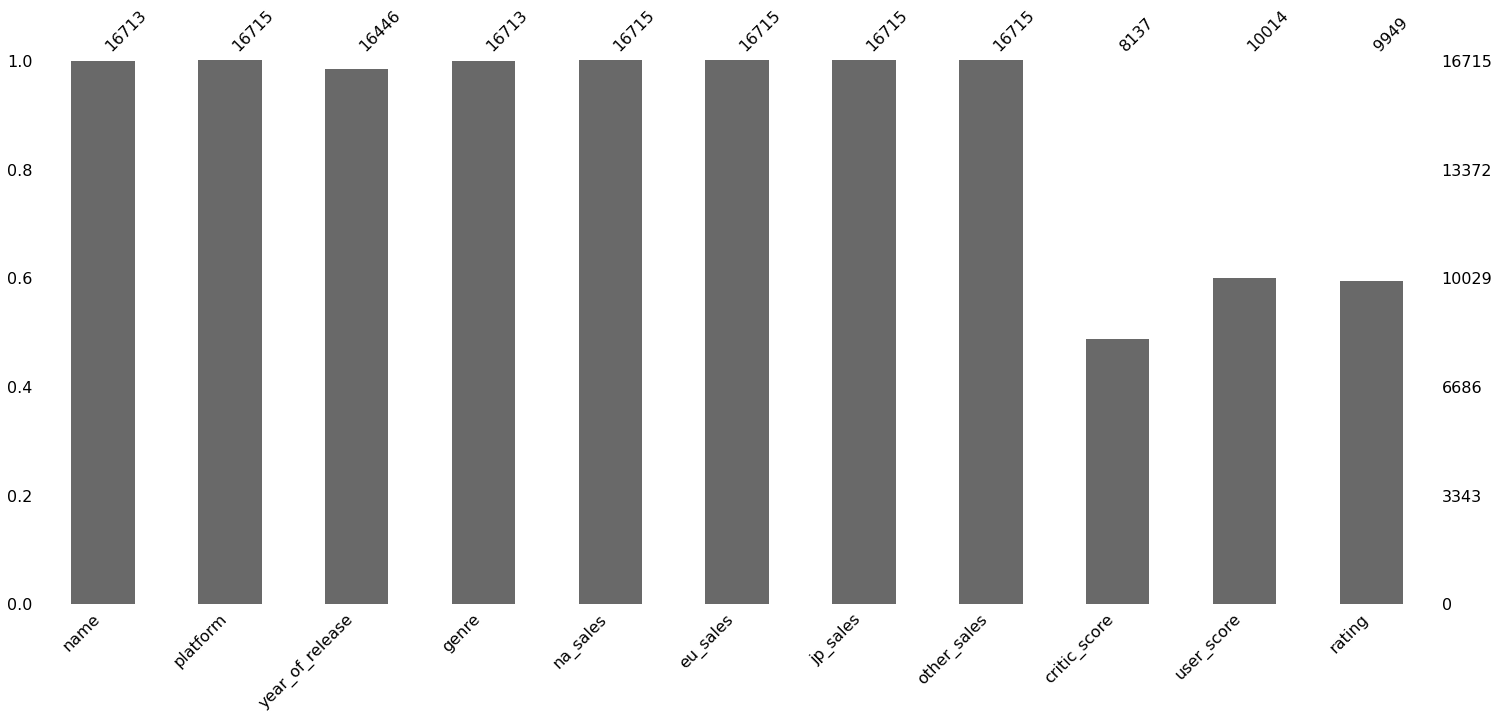

In [8]:
#визуализация соотношения и количества пропущенных переменных
msno.bar(df)
plt.show()

Посмотрим строки с пропусками в столбцах 'name', 'genre' и 'year_of_release'.

In [9]:
#вывод строк с пропусками в столбцах name, genre и year_of_release
df.query('name.isna() | genre.isna() | year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Учитывая, что процент содержания пропусков в данных столбцах минимальный, предлагаю удалить эти строки из датафрейма, на результат исследования это не повлияет. 

А вот с пропусками в оранжевой и красной зоне будем разбираться.

In [10]:
#удаление пропусков 
df = df.dropna(subset = ('name', 'genre', 'year_of_release'))

##### critic_score - оценка критиков

В данном столбце 51.32% пропусков, что очень много. Заполнение средним или медианным значениями будет нецелесообразно, произойдет искажение результатов исследования. Посмотрим на уникальные значения в столбце и выведем несколько строк с пропусками.

In [11]:
#уникальные значения столбца critic_score
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [12]:
#вывод строк с пропусками в столбце critic_score
df.query('critic_score.isna()').head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Какой-либо закономерности для заполнения не наблюдается, вероятно игры не оценивались вовсе, либо произошел сбой и данные не подгрузились. В любом случае заполнить конкретным значением мы не сможем, предлагаю заменить на 0.

In [13]:
#замена пропусков на 0 в столбце critic_score
df['critic_score'] = df['critic_score'].fillna(0)

##### user_score - оценка пользователей

В данном столбце 40.09% пропусков, также как и в столбце с рейтингом критиков заполнение средним или медианным значениями будет нецелесообразно, произойдет искажение результатов исследования. Заменим пропуски на 0.

Посмотрим на уникальные значения в столбце.

In [14]:
#уникальные значения столбца user_score
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Кроме nan, присутствуют еще значения 'tbd', что означает to be determined - будет определено. Сначала заменим эти значения на nan, затем все пропуски заполним нулями.

In [15]:
#замена tbd на nan 
df.loc[df['user_score'] == "tbd", 'user_score'] = np.nan
#замена пропусков на 0 в столбце user_score
df['user_score'] = df['user_score'].fillna(0)

##### rating - рейтинг от организации ESRB

ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Посмотрим на уникальные значения столбца.

In [16]:
#уникальные значения столбца rating
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Распишем их обозначение:

- E («Everyone») — «Для всех»
- M («Mature») — «Для взрослых» (от 17 лет)
- T («Teen») — «Подросткам»
- E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»
- K-A («Kids to Adults»)— «Для детей и взрослых (от 6 лет)
- AO («Adults Only 18+») — «Только для взрослых»
- EC («Early childhood») — «Для детей младшего возраста» (от 3 лет)
- RP («Rating Pending») — «Рейтинг ожидается»

Можно было бы заменить проспуки на RP («Rating Pending») — «Рейтинг ожидается», но данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза и мы не можем точно утверждать, что продукт был отправлен в ESRB и ожидает присвоения рейтинга, поэтому целесообразно заменить пропущенные значение на рейтинг неизвестен ('unknown').

In [17]:
#замена пропусков на 'unknown' в столбце rating
df['rating'] = df['rating'].fillna('unknown')

In [18]:
#подсчет пропусков
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### Изменение типов данных

In [19]:
#обзор типов данных в каждом столбце
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Изменим тип данных в столбцах 'year_of_release' и 'critic_score' с помощью astype(np.int32), так как они содержат целые числа.
Столбец 'user_score' приведем к типу float (числа с плавающей точкой).

In [20]:
#изменение типа данных
df['year_of_release'] = df['year_of_release'].astype(np.int32)
df['critic_score'] = df['critic_score'].astype(np.int32)
df['user_score'] = df['user_score'].astype(float)

#### Обработка дубликатов

In [21]:
#подсчёт явных дубликатов
df.duplicated().sum()

0

Явных дубликатов нет. Посмотрим есть ли неявные дубликаты в названиях игр.

Затем найдем в сроках повторения одновременно в столбце 'name', 'platform' и 'year_of_release'. Если смотреть только столбцы с названием игр и платформ, можем найти повторения одной и той же игры на той же платформе, но с разным годом релиза. Это будет уже не дубликат, а 2 разные части игры, например.

In [22]:
df['name'].value_counts().head(30)

Need for Speed: Most Wanted                  12
FIFA 14                                       9
LEGO Marvel Super Heroes                      9
Ratatouille                                   9
The LEGO Movie Videogame                      8
Madden NFL 07                                 8
FIFA Soccer 13                                8
Cars                                          8
FIFA 15                                       8
LEGO Star Wars II: The Original Trilogy       8
LEGO Jurassic World                           8
Lego Batman 3: Beyond Gotham                  8
Angry Birds Star Wars                         8
Terraria                                      8
LEGO The Hobbit                               8
Monopoly                                      8
Madden NFL 08                                 8
Pro Evolution Soccer 2012                     7
Surf's Up                                     7
Star Wars The Clone Wars: Republic Heroes     7
Spider-Man 3                            

In [23]:
#строки с дубликатами 
df[df.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83,5.5,E


Всего 1 дубликат с названием игры 'Madden NFL 13', проверим и затем удалим эту строку.	

In [24]:
#вывод строк с названием игры 'Madden NFL 13' на платформе PS3
df.query('name == "Madden NFL 13" & platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


In [25]:
#удаление сроки дубликата
df = df.drop_duplicates(['name', 'platform', 'year_of_release'])

#### Добавление нового столбца

Cуммарные продажи во всех регионах.

In [26]:
#добавление столбца с подсчетом суммартных продаж по всем регионам
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,unknown,0.01


#### Вывод

В ходе предобработки данных:
   - привели названия столбцов к нижнему регистру
   - удалены строки с пропусками в столбцах 'name', 'genre' и 'year_of_release' ввиду их малого количества и отсутствия вариантов заполнения пропущенных значений 
   - пропущенные значения в столбцах 'critic_score', 'user_score' заполнены нулями, в столбце 'rating' заменили значением 'unknown'
   - изменили тип данных на int в столбцах с целыми числами, на float c числами с плавающей точкой
   - выяснили, что явные дубликаты отсутствуют, удалили строку с неявными дубликатами
   - создан новый столбец с суммарными продажами во всех регионах

### Исследовательский анализ данных

#### Количество игр, выпущенные в разные годы. Важны ли данные за все периоды?

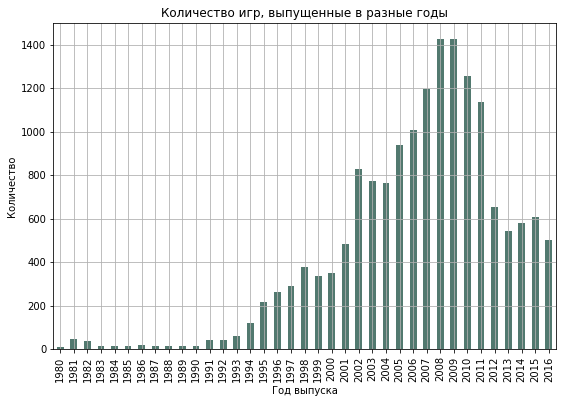

In [27]:
#сводная таблица количества игр в разные годы
(
    df.pivot_table(
    index='year_of_release',
    values='name',
    aggfunc='count')
    #визуализация 
    .plot(kind='bar', legend=False, grid=True, color='#52796f', figsize=(9, 6))
)
# настройки внешнего вида графика
plt.title('Количество игр, выпущенные в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
#показ графика
plt.show()

С 1995 года наблюдается увеличение количества выпускаемых игр, пик приходится на 2008-2009 года. После 2012 года резких скачков нет.

#### Платформы с наибольшими суммарными продажами. За какой характерный срок появляются новые и исчезают старые платформы?

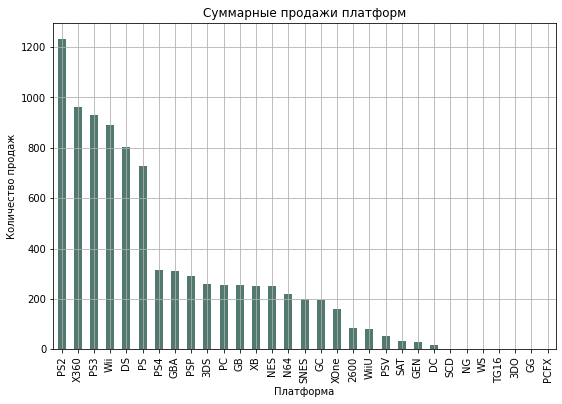

In [28]:
#сводная таблица суммарных продаж всех платформ
(
    df.pivot_table(
    index='platform',
    values='total_sales',
    aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    #визуализация
    .plot(kind='bar', legend=False, grid=True, color='#52796f', figsize=(9, 6))
)

# настройки внешнего вида графика
plt.title('Суммарные продажи платформ')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
#показ графика
plt.show()

Наибольшие суммарные продажи у 6 платформ: PS2, X360, PS3, Wii, DS и PS. Посмотрим на распределение продаж игр на данных платформах по годам.

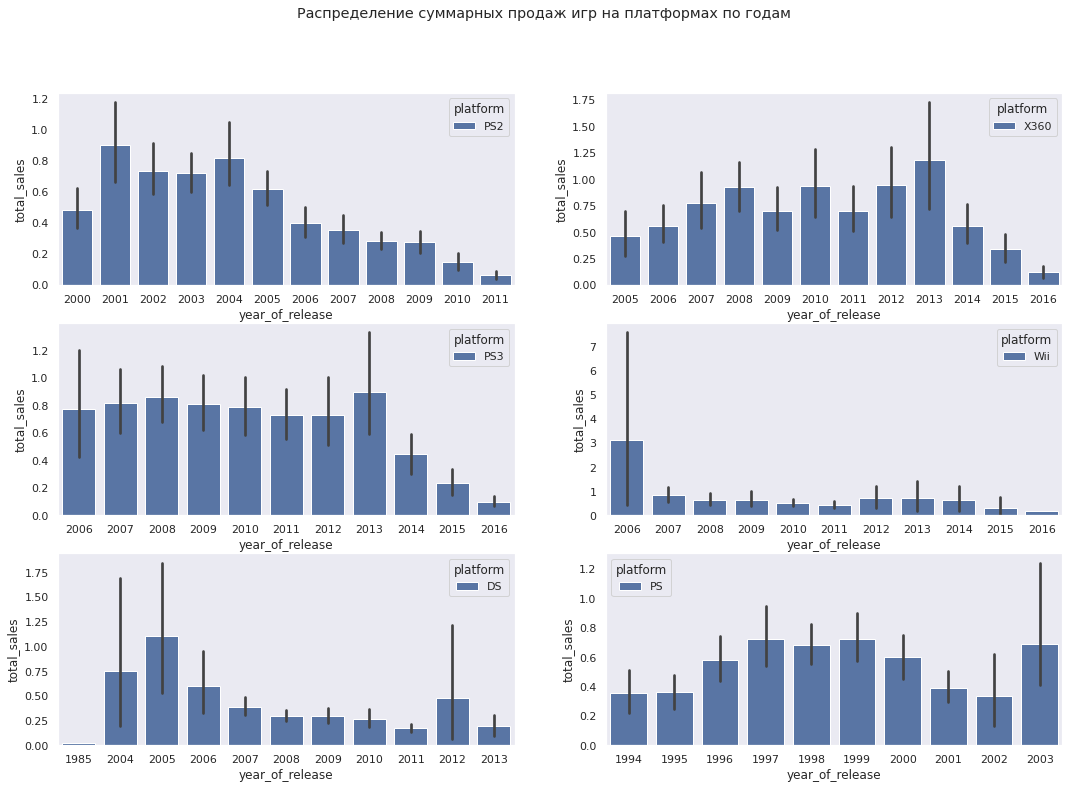

In [29]:
#выбор стиля
sns.set(style="dark")

#использование subplots для создания подграфиков
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))

#размещение графиков на подграфиках
sns.barplot(x="year_of_release", y='total_sales', data=df.query('platform=="PS2"'), ax=axes[0, 0], hue='platform')
sns.barplot(x="year_of_release", y='total_sales', data=df.query('platform=="X360"'), ax=axes[0, 1], hue='platform')
sns.barplot(x="year_of_release", y='total_sales', data=df.query('platform=="PS3"'), ax=axes[1, 0], hue='platform')
sns.barplot(x="year_of_release", y='total_sales', data=df.query('platform=="Wii"'), ax=axes[1, 1], hue='platform')
sns.barplot(x="year_of_release", y='total_sales', data=df.query('platform=="DS"'), ax=axes[2, 0], hue='platform')
sns.barplot(x="year_of_release", y='total_sales', data=df.query('platform=="PS"'), ax=axes[2, 1], hue='platform')

#настройка внешнего вида
fig.suptitle('Распределение суммарных продаж игр на платформах по годам')
plt.show()

По графикам видно, что жизненный цикл платформ с наибольшими суммарными продажами составляет около 10 лет. 

#### Выбор актуального периода

Исходя из вышеизложенных графиков ддя прогнозирования на 2017 год предлагаю взять период за последние 5 лет (2012-2016). Считаю, что данные 10 давности могут исказить общую картину, учитывая, что есть скачки в данных за этот период, а вот последние 5 лет они сравнительно стабильны.

In [30]:
#запишем в новую переменную обновленную таблицу с данными актуального периода
df_current = df[df['year_of_release']>=2012]

#### Потенциально прибыльные платформы

Построим 2 графика для определения потенциально прибыльных платформ:

- линейный график будет отражать как распределялась прибыль платформ  по годам 
- столбчатый график наглядно покажет у каких платформ самые высокие суммарные продажи

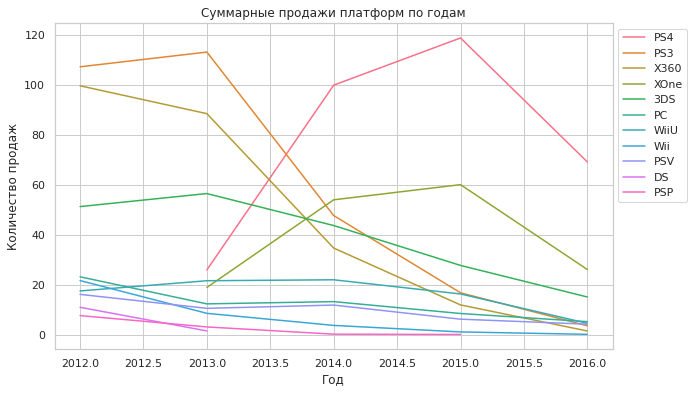

In [31]:
#сводная таблица суммарных продаж платформ актуального периода
sales_by_platform = df_current.pivot_table(
    index=('platform','year_of_release'),
    values='total_sales',
    aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()

#визуализация линейного графика
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=sales_by_platform, x='year_of_release', y='total_sales', hue='platform')

# настройки внешнего вида графика
plt.title('Суммарные продажи платформ по годам')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.legend(bbox_to_anchor=(1, 1))
#показ графика
plt.show()

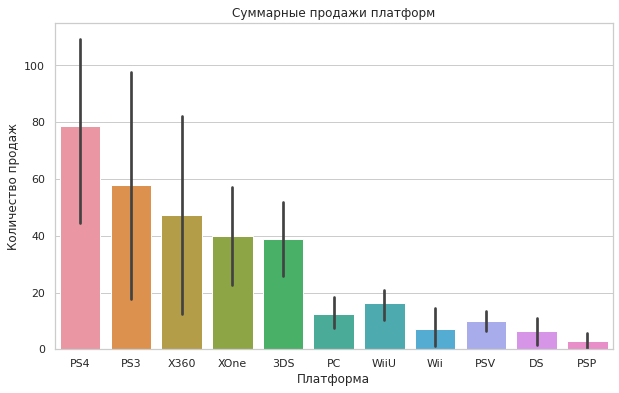

In [32]:
#визуализация столбчатой диаграммы 
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_platform, x='platform', y='total_sales')
# настройки внешнего вида графика
plt.title('Суммарные продажи платформ')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
#показ графика
plt.show()

На первом графике мы видим, что лидерами по продажам являются PS4, XOne и 3DS, несмотря на то, что по суммарной прибыли на 2 графике второе место занимает PS3, к концу 2016 года продажи резко сокращаются, как и у остальных платформ. Посмотрим на продажи лидеров по годам.

In [33]:
#вывод таблицы лидеров продаж 
sales_by_platform.query('platform==("PS4","XOne","3DS")').sort_values(by='platform', ascending=False)

,platform,year_of_release,total_sales
7,XOne,2015,60.14
9,XOne,2014,54.07
15,XOne,2016,26.15
21,XOne,2013,18.96
0,PS4,2015,118.90
3,PS4,2014,100.00
6,PS4,2016,69.25
16,PS4,2013,25.99
8,3DS,2013,56.57
10,3DS,2012,51.36


На первом месте PS4 с пиком продаж в 118.9 млн.копий на 2015 год, в 2016 году идет спад и продажи составляют 69.25 млн.копий.

На втором месте XOne с максимальными продажами в 2015 году - 60.14 млн.копий, далее также идет падение и в 2016 году продано 26.15 млн.копий.

На третьем месте расположилась платформа 3DS, у нее пик продаж приходится на 2013 год - 56.57 млн.копий, и также в 2016 происходит спад до 15.14 млн.копий.

#### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

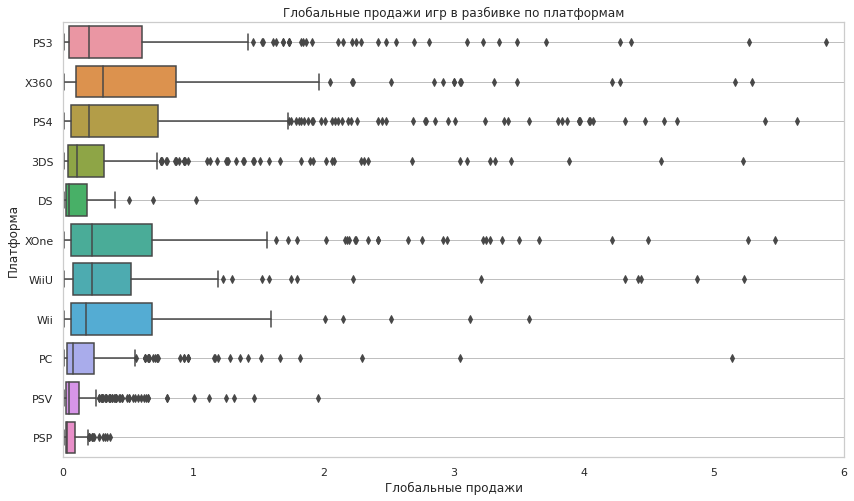

In [34]:
#построение ящика с усами (boxplot)
plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=df_current, y='platform', x='total_sales')
ax.set(xlim=(0, 6))
# Установка заголовка графика
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Глобальные продажи')
plt.ylabel('Платформа')
# Включение сетки на графике, серого цвета с прозрачностью 0.5 для обеих осей
plt.grid(color='grey', axis='both', alpha=0.5)
# Показ графика
plt.show()

Самое большое медианное значение глобальных продаж у X360, далее идут платформы PS3, PS4, XOne и WiiU. У всех платформ много выбросов, много игр, пользующиеся особой популярностью у платформ PS4, PS3, 3DS, XOne, X360 и WiiU. 

Но не стоит забывать, что у некоторых из вышеперечисленных платформ жизненный цикл подходит к концу и на их смену придут новые платформы, далее будем исследовать потенциально прибыльные - PS4, XOne и 3DS. 

#### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы 

Для исследования возьмем популярную платформу PS4, построим диаграмму рассеяивания и посчитаем корреляцию между отзывами и продажами.

Коэффициент корреляции Пирсона равен 0.40589480145836687


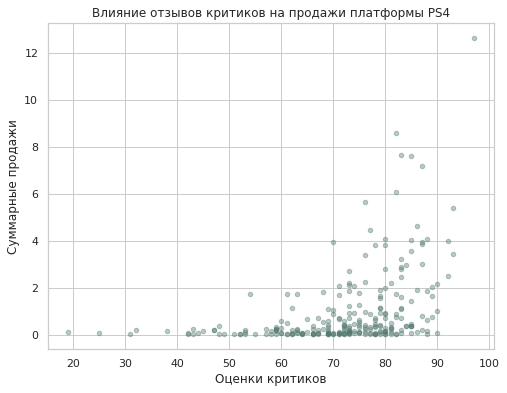

In [35]:
df_ps4 = df_current.query('platform=="PS4" & critic_score>0 & user_score>0')
#визуализация
df_ps4.plot(x='critic_score',
            y='total_sales', 
            kind= 'scatter',
            grid=True, color='#52796f', 
            figsize=(8, 6), 
            alpha = 0.4)

#вывод коэффициента корреляции
print('Коэффициент корреляции Пирсона равен', df_ps4['critic_score'].corr(df_ps4['total_sales']))
# настройки внешнего вида графика
plt.title('Влияние отзывов критиков на продажи платформы PS4')
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи')
#показ графика
plt.show()

Коэффициент корреляции Пирсона равен -0.03362497596528878


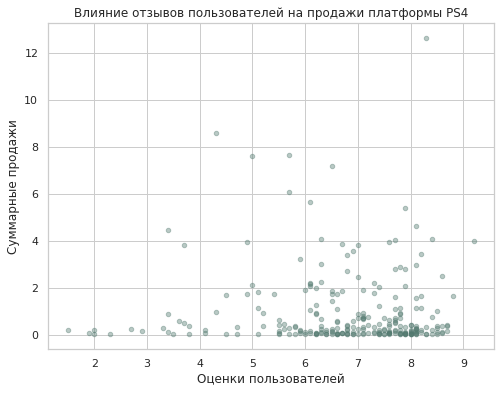

In [36]:
#визуализация
df_ps4.plot(x='user_score',
            y='total_sales', 
            kind= 'scatter', 
            grid=True, 
            color='#52796f', 
            figsize=(8, 6), 
            alpha = 0.4)

#вывод коэффициента корреляции
print('Коэффициент корреляции Пирсона равен', df_ps4['user_score'].corr(df_ps4['total_sales']))
# настройки внешнего вида графика
plt.title('Влияние отзывов пользователей на продажи платформы PS4')
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи')
#показ графика
plt.show()

Корреляция между отзывами критиков и продажами платформы PS4 - 0.4, что говорит о умеренной положительной связи, корреляция между отзывами пользователей -0.03, связь отстутсвует. 

Посмотрим на корреляцию еще несколько крупных по продажам платформ - 3DS и XOne.

In [37]:
df_3ds = df_current.query('platform=="3DS" & critic_score>0 & user_score>0')

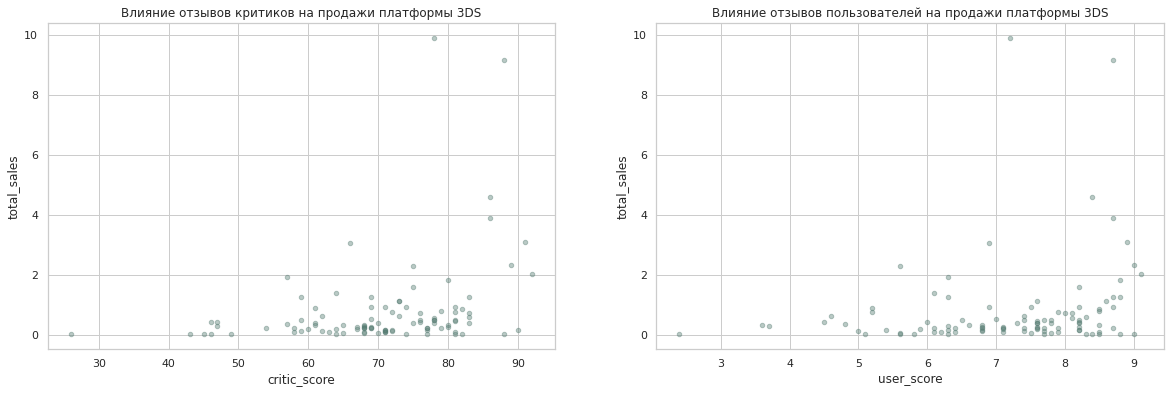

Коэффициент корреляции продаж от оценки критиков 0.31055301915326294
Коэффициент корреляции продаж от оценки пользователей 0.20181255007655283


In [38]:
#использование subplots для создания подграфиков
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

df_3ds.plot(x='critic_score', y='total_sales', kind= 'scatter', grid=True, color='#52796f', alpha = 0.4, ax=axes[0])
#установка заголовка графика
axes[0].set_title('Влияние отзывов критиков на продажи платформы 3DS')

df_3ds.plot(x='user_score', y='total_sales', kind= 'scatter', grid=True, color='#52796f', alpha = 0.4, ax=axes[1])
#установка заголовка графика
axes[1].set_title('Влияние отзывов пользователей на продажи платформы 3DS')

#показ графика
plt.show()

#вывод коэффициента корреляции
print('Коэффициент корреляции продаж от оценки критиков', df_3ds['critic_score'].corr(df_3ds['total_sales']))
print('Коэффициент корреляции продаж от оценки пользователей', df_3ds['user_score'].corr(df_3ds['total_sales']))

In [39]:
df_xone = df_current.query('platform=="XOne" & critic_score>0 & user_score>0')

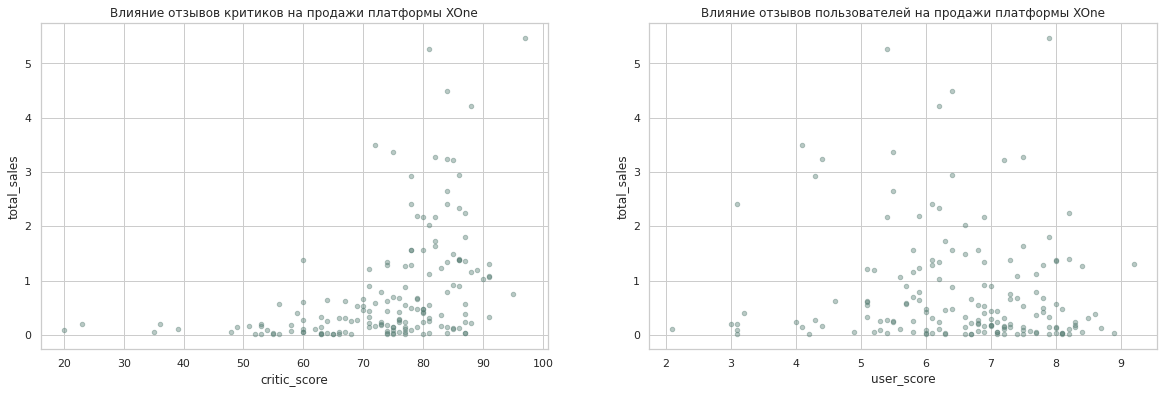

Коэффициент корреляции продаж от оценки критиков 0.41042203561296375
Коэффициент корреляции продаж от оценки пользователей -0.09400318326920852


In [40]:
#использование subplots для создания подграфиков
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

df_xone.plot(x='critic_score', y='total_sales', kind= 'scatter', grid=True, color='#52796f', alpha = 0.4, ax=axes[0])
#установка заголовка графика
axes[0].set_title('Влияние отзывов критиков на продажи платформы XOne')

df_xone.plot(x='user_score', y='total_sales', kind= 'scatter', grid=True, color='#52796f', alpha = 0.4, ax=axes[1])
#установка заголовка графика
axes[1].set_title('Влияние отзывов пользователей на продажи платформы XOne')

#показ графика
plt.show()

#вывод коэффициента корреляции
print('Коэффициент корреляции продаж от оценки критиков', df_xone['critic_score'].corr(df_xone['total_sales']))
print('Коэффициент корреляции продаж от оценки пользователей', df_xone['user_score'].corr(df_xone['total_sales']))

Для 3-х исследуемых платформ PS4, 3DS и XOne корреляция между отзывами критиков и продажами 0.3-0.4, что говорит о умеренной положительной связи. Влияние отзывов пользователей на продажи не установлено, вероятно отзывы критиков больше ценятся среди пользователей. 

#### Общее распределение игр по жанрам

In [41]:
#сгруппируем данные игр по жанрам и посчитаем их количество и медианное значение продаж
df_current.groupby('genre')['total_sales'].agg({'count','median'}).sort_values(by='median', ascending=False)

,count,median
genre,,
Shooter,235,0.440
Sports,267,0.240
Platform,85,0.210
Role-Playing,370,0.140
Racing,115,0.140
Fighting,109,0.130
Action,1031,0.120
Misc,192,0.120
Simulation,80,0.120


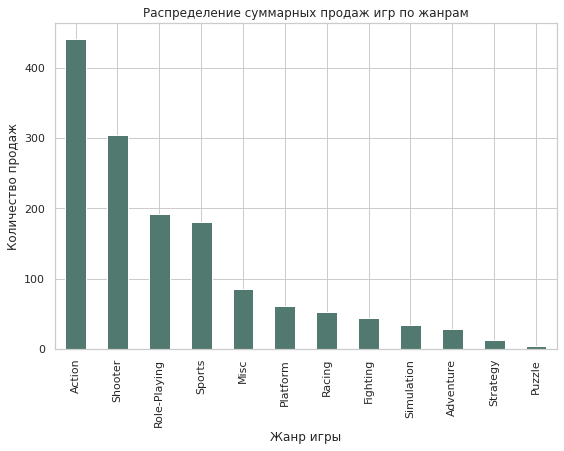

In [42]:
#сводная таблица суммарных продаж игр по жанрам
(
    df_current.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    #визуализация
    .plot(kind='bar', legend=False, grid=True, color='#52796f', figsize=(9, 6))
)

# настройки внешнего вида графика
plt.title('Распределение суммарных продаж игр по жанрам')
plt.xlabel('Жанр игры')
plt.ylabel('Количество продаж')
#показ графика
plt.show()

Суммарные продажи больше всего у игр в жанре *Action и Shooter*, наименьшие у игр в жанре *Puzzle*.

При этом в сравнении с медианными значениями продаж игры с жанрами *Shooter и Sports* более востребованы, а *Action* лидирует по суммарным продажам в виду их большего количества, по медианному значению же он далеко не в топе.

Игры в жанре *Adventure* самые невостребованные по медианному значению прибыли, хотя они находятся на 2 месте по количеству. Предпочтение им отдавать точно не стоит.

#### Вывод

В ходе исследовательского анализа выяснили, что жизненный цикл платформ составляет около 10 лет. Актуальный период для дальнейшего анализа был взят для 2012-2016 годов, т.е. последние 5 лет, так как именно в этот период нет резких скачков по выпуску игр и данные более "свежие". 

Лидерами по продажам актуального периода являются платформы PS4, XOne и 3DS. Пользователи чаще ориентируются на отзывы критиков при выборе игр на данных платформах, корреляция в диапозоне 0.3-0.4, что говорит о умеренной положительной связи. 

Наиболее прибыльные игры в жанре Shooter и Sports, по количеству жанр Action превосходит остальных.
А вот Adventure и Puzzle практически невостребованы.


### Составление портрета пользователя каждого региона

#### Топ-5 популярных платформ  каждого региона

In [43]:
#объявление функции с параметром row
def top_platform(row):
    #группировка
    result = (df_current.groupby('platform')[row]
              .agg('sum').sort_values(ascending = False)[:5])
    return result

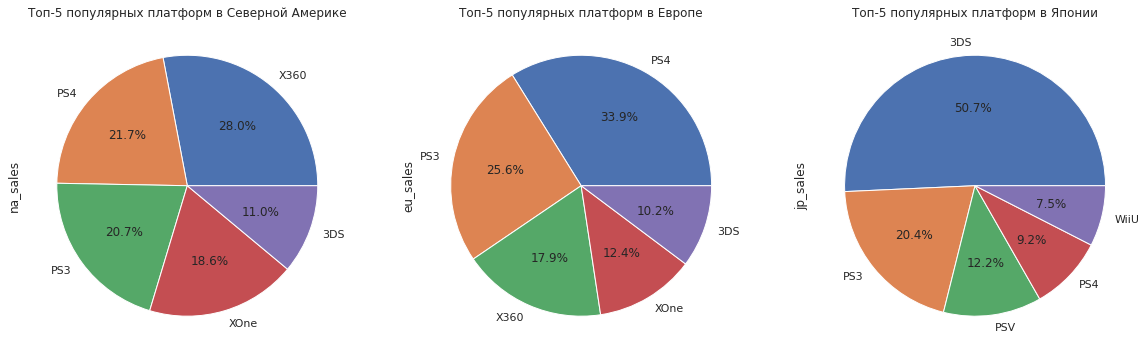

In [44]:
#использование subplots для создания подграфиков
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

top_platform('na_sales').plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
#установка заголовка графика
axes[0].set_title('Топ-5 популярных платформ в Северной Америке')

top_platform('eu_sales').plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
#установка заголовка графика
axes[1].set_title('Топ-5 популярных платформ в Европе')

top_platform('jp_sales').plot(kind='pie', autopct='%1.1f%%', ax=axes[2])
#установка заголовка графика
axes[2].set_title('Топ-5 популярных платформ в Японии')

#показ графика
plt.show()

В Северной Америке и Европе в топе находятся одни и те же платформы - PS4, PS3, 3DS, XOne и X360. В Японии же наблюдается использование PSV и WiiU, а 50,7% пользуется платформой 3DS.

#### Топ-5 популярных жанров каждого региона

In [45]:
#объявление функции с параметром row
def top_genre(row):
    #группировка 
    result = (df_current.groupby('genre')[row]
              .agg('sum').sort_values(ascending = False)[:5])
    return result

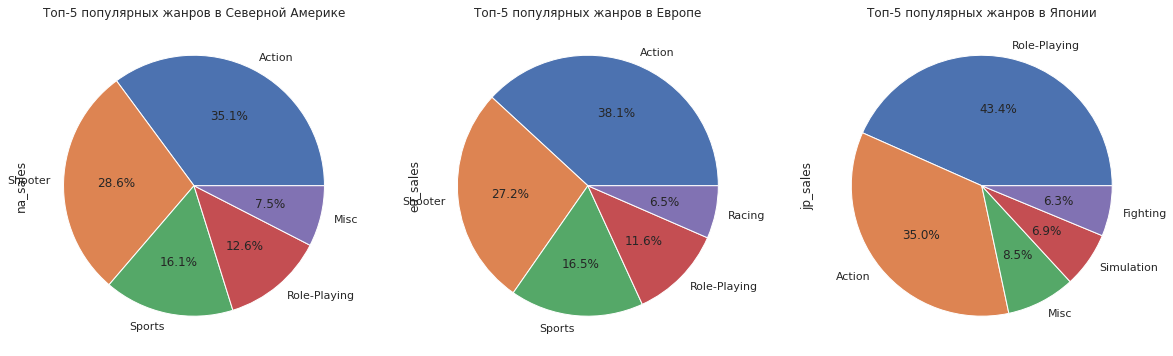

In [46]:
#использование subplots для создания подграфиков
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

top_genre('na_sales').plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
#установка заголовка графика
axes[0].set_title('Топ-5 популярных жанров в Северной Америке')

top_genre('eu_sales').plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
#установка заголовка графика
axes[1].set_title('Топ-5 популярных жанров в Европе')

top_genre('jp_sales').plot(kind='pie', autopct='%1.1f%%', ax=axes[2])
#установка заголовка графика
axes[2].set_title('Топ-5 популярных жанров в Японии')
#показ графика
plt.show()

В Северной Америке и Европе одиноковый топ-4 по жанру игр, это - Action, Shooter, Sports и Role-Playing. 
Пользователи Японии отдают предпочтение Role-Playing и Action.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [47]:
#объявление функции с параметром row
def top_rating(row):
    #группировка 
    result = df_current.groupby('rating')[row].agg('sum')
    return result

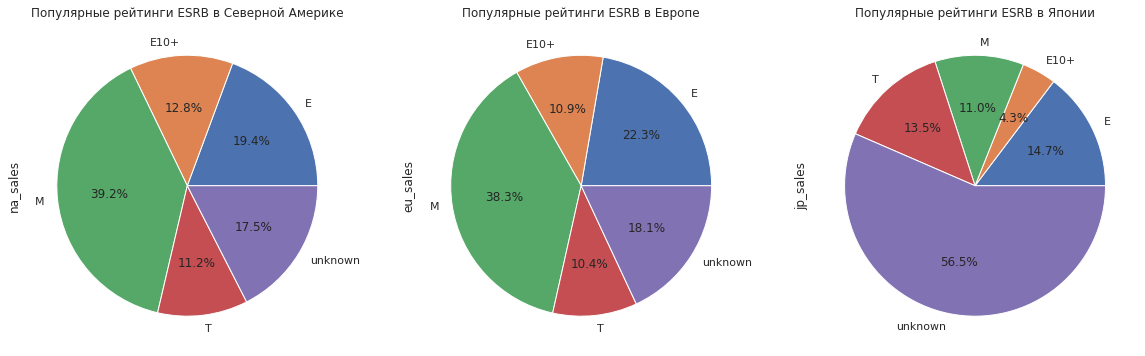

In [48]:
#использование subplots для создания подграфиков
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

top_rating('na_sales').plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
#установка заголовка графика
axes[0].set_title('Популярные рейтинги ESRB в Северной Америке')

top_rating('eu_sales').plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
#установка заголовка графика
axes[1].set_title('Популярные рейтинги ESRB в Европе')

top_rating('jp_sales').plot(kind='pie', autopct='%1.1f%%', ax=axes[2])
#установка заголовка графика
axes[2].set_title('Популярные рейтинги ESRB в Японии')
#показ графика
plt.show()

Около 60% игроков В Северной Америке и Европе приобретают игры с рейтингом M («Для взрослых» от 17 лет) и E («Для всех»), минимальное количество с рейтингом T («Подросткам»). 

В Японии отдают предпочтение играм без рейтинга - 56.5%, минимальное количество приобретаемых игр с рейтингом E10+ («Для всех от 10 лет и старше»).

#### Вывод

Портрет пользователя в регионе NA:

- предпочитают платформы X360 (28%), PS4 (21.7%) и PS3 (20.7%)
- жанр игр Action (35.1%), Shooter (28.6%) 
- рейтинг в основном М (39.2%) и Е (19.4%)

Портрет пользователя в регионе EU:

- предпочитают платформы PS4 (33.9%), PS3 (25.6%) и X360 (17.9%)
- жанр игр Action (38.1%), Shooter (27.2%) 
- рейтинг в основном М (38.3%) и Е (22.3%)

*По данным регионов Северной Америки и Европе можем сделать вывод, что портрет пользователей очень схож, пользователи этих регионов предпочитают одни и теже платформы, жанры и рейтинг ESRB.*

Портрет пользователя в регионе JP:

- предпочитают платформы 3DS (50.7%) и PS3 (20.4%)
- жанр игр Role-Playing (43.4%) и Action (35%)
- в основном без рейтинга (56.5%), Е (14.7%) и Т (13.5%)

*В Японии налюдается предпочтение к платформе 3DS и отсутствию рейтинга ESRB.*

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проверки гипотезы будем использовать двухвыборочный t-тест для независимых выборок, так как мы сравниваем средние двух ГС, из которых независимо взяты две выборки. Нулевая гипотеза формулируется как «истинные средние этих двух ГС равны», альтернативная - «истинные средние этих двух ГС не равны/больше/меньше». В нашем случае проверяем не равенство.

Применяется метод scipy.stats.ttest_ind() с проверкой двусторонней альтернативной гипотезы (alternative='two-sided').

Сформулируем гипотезы.

Нулевая гипотеза:

   - H0: Средние пользовательские рейтинги платформ XOne и PC равны
    
Альтернативная гипотеза:

   - H1: Средние пользовательские рейтинги платформ XOne и PC не равны

In [49]:
xone = df_current.query('platform=="XOne" & user_score>0')
pc = df_current.query('platform=="PC" & user_score>0')
display(xone['user_score'].describe())
pc['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

Размеры выборок разные, значит дисперсии тоже, поэтому установим аргумент equal_var=False.

Выборки небольшие, поэтому определим уровень статистической значимости - 0.05.

In [50]:
#выбранный уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(
    xone['user_score'],
    pc['user_score'],
    equal_var=False)

#выведем полученное p-value
print('p-значение:', results.pvalue)

#вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 0.5489537965134912
Нет оснований отвергнуть нулевую гипотезу


Полученное значение p-value больше заданного уровня значимости, поэтому нулевую гипотезу не отвергаем. Есть основание утверждать, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### Средние пользовательские рейтинги жанров Action  и Sports разные.

Проверка гипотезы будет осуществляться по принципу гипотезы в п.5.1

Сформулируем гипотезы.

Нулевая гипотеза:

   - H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
    
Альтернативная гипотеза:

   - H1: Средние пользовательские рейтинги жанров Action и Sports разные

In [51]:
action = df_current.query('genre=="Action" & user_score>0')
sports = df_current.query('genre=="Sports" & user_score>0')
display(action['user_score'].describe())
sports['user_score'].describe()

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

count    194.000000
mean       5.455670
std        1.743142
min        0.200000
25%        4.300000
50%        5.750000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

Размеры выборок разные, значит дисперсии тоже, поэтому установим аргумент equal_var=False.

Выборки небольшие, поэтому определим уровень статистической значимости - 0.05.

In [52]:
#выбранный уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
    equal_var=False)

#выведем полученное p-value
print('p-значение:', results.pvalue)

#вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 5.989458066467418e-20
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости (близко к 0), поэтому нулевая гипотеза отвергнута. Нет основания утверждать, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

#### Вывод

В ходе проверки двух гипотез делаем выводы:

- можем утверждать, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
- не можем утверждать, что средние пользовательские рейтинги жанров Action и Sports одинаковые

### Общий вывод

В ходе нашего исследования были выполнены следующие шаги:

1. Загрузка данных и обзор общей информации

    - в таблице 11 столбцов и 16715 записей с данными об играх
    - в 4 столбцах обнаружены пропущенные значения 
    - в 3 столбцах некорректный тип данных 
    - наименование столбцов необходимо скорректировать


2. Предобработка данных 

    - привели названия столбцов к нижнему регистру
    - в столбцах с большим количеством пропусков 'critic_score' и 'user_score' значения заменили на 0, в столбце 'rating' заменили значением 'unknown'
    - удалены строки с пропусками в столбцах 'name', 'genre' и 'year_of_release' ввиду их малого количества и отсутствия вариантов заполнения пропущенных значений
    - тип данных в столбцах 'year_of_release' и 'critic_score' заменен на корректный
    - удалена 1 строка с неявными дубликатами, явные дубликаты отсутствуют 
    - создали новый столбец с суммарными продажами по всем регионам


3. Исследовательский анализ данных

    - актуальный период для анализа взят для 2012-2016 годов, так как именно в этот период нет резких скачков по выпуску игр и данные более "свежие"
    - выявили умеренную положительную связь между отзывами критиков и продажами игр, пользователи, вероятно, доверяют их мнению
    - игры в жанре Shooter и Sports превосходят по медианным продажам, Adventure и Puzzle практически невостребованы. По количеству выпускаемых жанр Action на первом месте.
    - лидерами по продажам актуального периода являются платформы PS4, XOne и 3DS

К 2016 году происходит спад суммарных продаж у всех платформ, но у выявленных лидеров показатели выше остальных и в 2016 году картина следующая:
        - PS4 - 69.25 млн.копий
        - XOne - 26.15 млн.копий
        - 3DS - 15.14 млн.копий
        

4. Составление портрета пользователя каждого региона

    - портрет пользователей Северной Америки и Европы очень схож, они используют платформы PS4, PS3 и X360, жанры Action и Shooter, рейтинг ESRB игр в основном M («Для взрослых» от 17 лет) и E («Для всех»)
    - в Японии наблюдаются отличия, пользователи предпочитают платформы 3DS и PS3, жанры игр Role-Playing и Action, в большинстве без рейтинга ESRB, либо с Е («Для всех») и Т («Подросткам»)


5. Проверка гипотез выявила, что:

    - можем утверждать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - не можем утверждать, что средние пользовательские рейтинги жанров Action и Sports одинаковые


***Рекомендации:***

В целях планирования рекламных кампаний интернет-магазину «Стримчик» рекомендуется на 2017 год рассмотреть игры в жанрах Action, Shooter и Sports с высокими оценками критиков на платформах PS4 и XOne и рейтингом M («Для взрослых» от 17 лет) для регионов Северной Америки и Европы. Для Японии игры в жанрах Role-Playing и Action с высокими оценками критиков на платформах 3DS без рейтинга ESRB.



